In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

commodity = pd.read_csv("commodity_lastprice.csv")
commodities = sorted([x for x in commodity.columns if x != "date"])
commodity["date"] = pd.to_datetime(commodity["date"])
commodity.head(3)

,date,Corn Futures,Crude Oil,Heating Oil,Wheat,Cocoa,Coffee,Natural Gas,Oats,RBOB Gasoline,Rough Rice,Soybean Meal Futures,Soybean Oil Futures,Sugar #11,Newcastle Coal,Barley
0,2018-01-02,353.25,60.369999,2.0584,433.5,1936.0,130.199997,3.056,242.50,1.7631,11.535,318.100006,33.380001,15.33,102.65,1524.0
1,2018-01-03,353.00,61.630001,2.0880,436.0,1907.0,128.600006,3.008,244.50,1.7974,11.410,318.799988,33.759998,15.31,103.80,1489.0
2,2018-01-04,351.00,62.009998,2.0770,434.0,1905.0,129.550003,2.880,245.75,1.8067,11.475,319.899994,33.740002,15.25,104.95,1515.0


In [2]:
comment = pd.read_csv("comment_by_sub_date.csv")
comment = comment.groupby("created_date", as_index=False).agg({"Counts": "sum"})
comment = comment.rename(columns={"created_date": "date", 
                                 "Counts": "Comments"})

submission = pd.read_csv("submission_by_sub_date.csv")
submission = submission.groupby("created_date", as_index=False).agg({"Counts": "sum"})
submission = submission.rename(columns={"created_date": "date", 
                                 "Counts": "Submissions"})

reddit = comment.merge(submission, on="date")
reddit["combined"] = reddit["Comments"] + reddit["Submissions"]
reddit["date"] = pd.to_datetime(reddit["date"])
reddit.head(3)

,date,Comments,Submissions,combined
0,2022-01-01,626,46,672
1,2022-01-02,622,59,681
2,2022-01-03,767,68,835


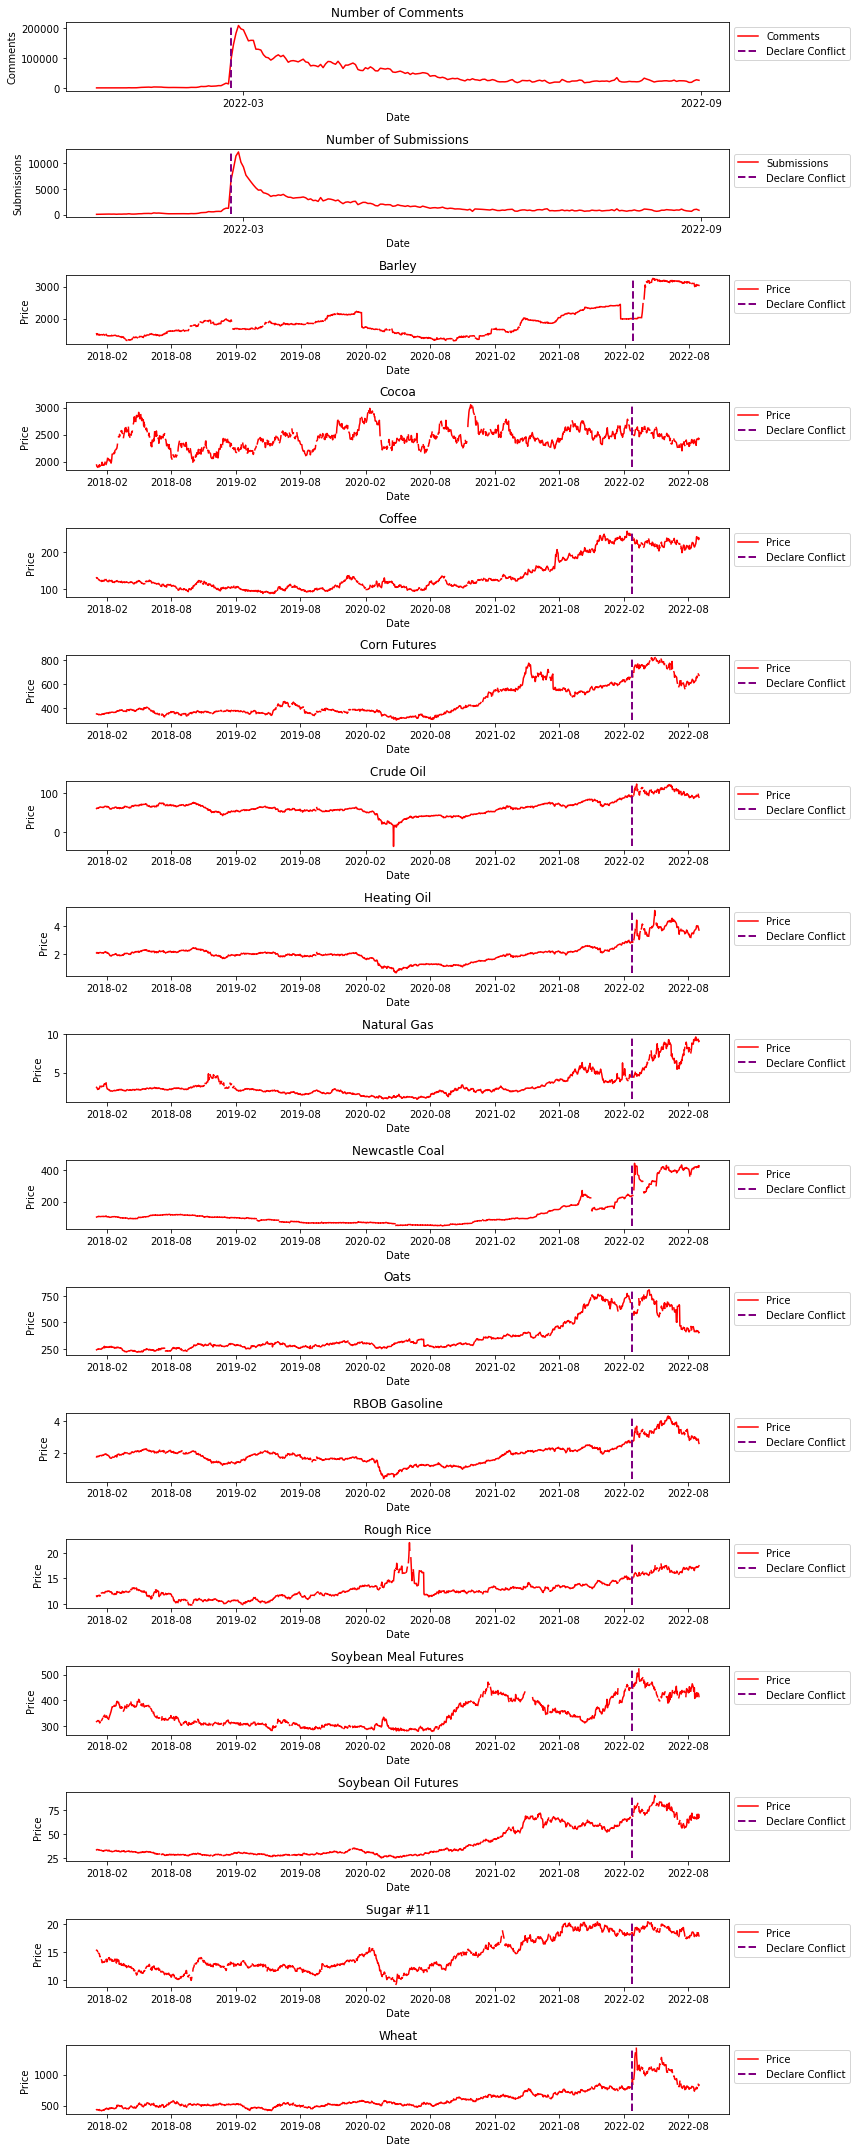

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams.update({'figure.figsize':(12,30)})
# fig, ax = plt.subplots(len(commodities), 
#            sharex='col', sharey='row')

ax = plt.subplot(len(commodities)+2, 1, 1)
plt.plot(reddit["date"], reddit["Comments"],color="red", label="Comments")
plt.vlines(x=["2022-02-24"], ymin=min(reddit["Comments"]), ymax=max(reddit["Comments"]),
        colors='purple', ls='--', lw=2, label='Declare Conflict')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Date')
plt.ylabel("Comments")
plt.title("Number of Comments")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

ax = plt.subplot(len(commodities)+2, 1, 2)
plt.plot(reddit["date"], reddit["Submissions"],color="red", label="Submissions")
plt.vlines(x=["2022-02-24"], ymin=min(reddit["Submissions"]), ymax=max(reddit["Submissions"]),
        colors='purple', ls='--', lw=2, label='Declare Conflict')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Date')
plt.ylabel("Submissions")
plt.title("Number of Submissions")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')

for i, name in enumerate(commodities):
    ax = plt.subplot(len(commodities)+2, 1, i+3)
    plt.plot(commodity["date"], commodity[name],color="red", 
             label='Price')
    plt.vlines(x=["2022-02-24"], ymin=min(commodity[name]), ymax=max(commodity[name]),
        colors='purple', ls='--', lw=2, label='Declare Conflict')
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.xlabel('Date')
    plt.ylabel("Price")
    plt.title(name)
    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.tight_layout()
plt.savefig('test.png')
plt.show()

<Figure size 864x2880 with 0 Axes>